In [3]:
%matplotlib notebook
import matplotlib as plt
import pandas as pd
from io import StringIO

In [4]:
strdata = """
0 1 0.0002129077911
1 1 6.294250488e-05
2 1 2.861022949e-06
3 1 4.053115845e-06
4 1 9.059906006e-06
5 1 2.145767212e-06
6 1          0
7 1 1.001358032e-05
8 1 4.053115845e-06
9 1 1.192092896e-06
10 1 9.536743164e-07
11 1 6.914138794e-06
12 1 5.006790161e-06
13 1 5.793571472e-05
14 1 1.001358032e-05
15 1 0.001263856888
16 1 0.0001459121704
17 1 0.0001759529114
18 1 0.0005061626434
19 1 0.001912117004
20 1 0.0001389980316
21 1 2.288818359e-05
22 1 9.536743164e-07
23 1          0
24 1 9.536743164e-07
25 1 6.818771362e-05
26 1 2.217292786e-05
27 1 1.192092896e-06
28 1          0
29 1 9.536743164e-07
0 10 7.152557373e-06
1 10 5.292892456e-05
2 10 1.692771912e-05
3 10 6.508827209e-05
4 10 1.71661377e-05
5 10 9.536743164e-07
6 10          0
7 10 1.907348633e-06
8 10 6.294250488e-05
9 10 1.811981201e-05
10 10 1.907348633e-06
11 10 9.536743164e-07
12 10 6.318092346e-05
13 10 1.71661377e-05
14 10 2.861022949e-06
15 10          0
16 10          0
17 10          0
18 10          0
19 10 4.053115845e-06
20 10          0
21 10 6.699562073e-05
22 10 1.692771912e-05
23 10 1.192092896e-06
24 10 9.536743164e-07
25 10 6.198883057e-05
26 10 1.692771912e-05
27 10 6.103515625e-05
28 10 1.59740448e-05
29 10 1.907348633e-06
0 100 7.700920105e-05
1 100 4.053115845e-06
2 100 9.536743164e-07
3 100 1.907348633e-06
4 100 6.699562073e-05
5 100 1.621246338e-05
6 100 6.604194641e-05
7 100 1.71661377e-05
8 100 5.888938904e-05
9 100 1.811981201e-05
10 100 1.907348633e-06
11 100 9.536743164e-07
12 100          0
13 100 9.536743164e-07
14 100 9.536743164e-07
15 100 6.103515625e-05
16 100 1.788139343e-05
17 100 1.907348633e-06
18 100 9.536743164e-07
19 100 9.536743164e-07
20 100 9.536743164e-07
21 100 5.984306335e-05
22 100 1.907348633e-05
23 100 1.907348633e-06
24 100 9.536743164e-07
25 100 9.536743164e-07
26 100          0
27 100 5.698204041e-05
28 100 1.883506775e-05
29 100 9.536743164e-07
0 1000 1.907348633e-06
1 1000 1.907348633e-06
2 1000 6.008148193e-05
3 1000 2.002716064e-05
4 1000 2.145767212e-06
5 1000 1.907348633e-06
6 1000 9.536743164e-07
7 1000 5.316734314e-05
8 1000 1.502037048e-05
9 1000 9.536743164e-07
10 1000 6.103515625e-05
11 1000 1.59740448e-05
12 1000 2.145767212e-06
13 1000 9.536743164e-07
14 1000 1.907348633e-06
15 1000 6.103515625e-05
16 1000 1.59740448e-05
17 1000 2.145767212e-06
18 1000 2.145767212e-06
19 1000 6.198883057e-05
20 1000 1.59740448e-05
21 1000 2.861022949e-06
22 1000 9.536743164e-07
23 1000 9.536743164e-07
24 1000 5.793571472e-05
25 1000 1.502037048e-05
26 1000 6.103515625e-05
27 1000 1.502037048e-05
28 1000 9.536743164e-07
29 1000 1.192092896e-06
0 10000 9.202957153e-05
1 10000 5.960464478e-06
2 10000 6.604194641e-05
3 10000 1.788139343e-05
4 10000 6.294250488e-05
5 10000 1.811981201e-05
6 10000 6.198883057e-05
7 10000 1.883506775e-05
8 10000 3.099441528e-06
9 10000 5.793571472e-05
10 10000 2.098083496e-05
11 10000 2.145767212e-06
12 10000 4.053115845e-06
13 10000 2.861022949e-06
14 10000 5.483627319e-05
15 10000 1.692771912e-05
16 10000 3.099441528e-06
17 10000 3.099441528e-06
18 10000 6.103515625e-05
19 10000 1.71661377e-05
20 10000 4.053115845e-06
21 10000 3.814697266e-06
22 10000 5.912780762e-05
23 10000 1.692771912e-05
24 10000 6.198883057e-05
25 10000 1.692771912e-05
26 10000 2.861022949e-06
27 10000 2.861022949e-06
28 10000 3.099441528e-06
29 10000 5.912780762e-05
0 100000 0.0009031295776
1 100000 0.000116109848
2 100000 9.083747864e-05
3 100000 7.891654968e-05
4 100000 7.295608521e-05
5 100000 7.104873657e-05
6 100000 7.915496826e-05
7 100000 3.814697266e-05
8 100000 0.0001149177551
9 100000 8.296966553e-05
10 100000 8.010864258e-05
11 100000 7.390975952e-05
12 100000 3.814697266e-05
13 100000 9.703636169e-05
14 100000 8.487701416e-05
15 100000 4.506111145e-05
16 100000 9.489059448e-05
17 100000 7.700920105e-05
18 100000 7.796287537e-05
19 100000 7.700920105e-05
20 100000 8.106231689e-05
21 100000 7.700920105e-05
22 100000 7.820129395e-05
23 100000 7.009506226e-05
24 100000 7.796287537e-05
25 100000 4.601478577e-05
26 100000 8.201599121e-05
27 100000 6.794929504e-05
28 100000 5.197525024e-05
29 100000 8.893013e-05
0 1000000 0.00123000145
1 1000000 0.0004630088806
2 1000000 0.001124858856
3 1000000 0.00084400177
4 1000000 0.0009310245514
5 1000000 0.000969171524
6 1000000 0.0008208751678
7 1000000 0.0005149841309
8 1000000 0.0006291866302
9 1000000 0.0005819797516
10 1000000 0.0002958774567
11 1000000 0.000293970108
12 1000000 0.0002789497375
13 1000000 0.0002841949463
14 1000000 0.0002670288086
15 1000000 0.0002770423889
16 1000000 0.0002641677856
17 1000000 0.0002799034119
18 1000000 0.0004510879517
19 1000000 0.0003108978271
20 1000000 0.0003261566162
21 1000000 0.0002841949463
22 1000000 0.0002999305725
23 1000000 0.0002739429474
24 1000000 0.0002980232239
25 1000000 0.0002818107605
26 1000000 0.0002751350403
27 1000000 0.0002598762512
28 1000000 0.00026512146
29 1000000 0.0002729892731
0 10000000 0.01272392273
1 10000000 0.002970933914
2 10000000 0.002874851227
3 10000000 0.003041028976
4 10000000 0.003403186798
5 10000000 0.00502705574
6 10000000 0.00415802002
7 10000000 0.005569934845
8 10000000 0.003238916397
9 10000000 0.003858089447
10 10000000 0.003670930862
11 10000000 0.01267290115
12 10000000 0.003268003464
13 10000000 0.00327205658
14 10000000 0.004445075989
15 10000000 0.005733966827
16 10000000 0.005654096603
17 10000000 0.01168107986
18 10000000 0.004955053329
19 10000000 0.005373001099
20 10000000 0.003342866898
21 10000000 0.002833843231
22 10000000 0.003001928329
23 10000000 0.008074045181
24 10000000 0.005030155182
25 10000000 0.00303196907
26 10000000 0.002888917923
27 10000000 0.003226041794
28 10000000 0.005709886551
29 10000000 0.005650997162
"""

In [5]:
df = pd.read_csv(StringIO(strdata), sep=" ", names=["try", "len", "time"])

In [8]:
df['throughput']=(2 * df['len']/df['time']) / 1000000 # MB/s

<IPython.core.display.Javascript object>


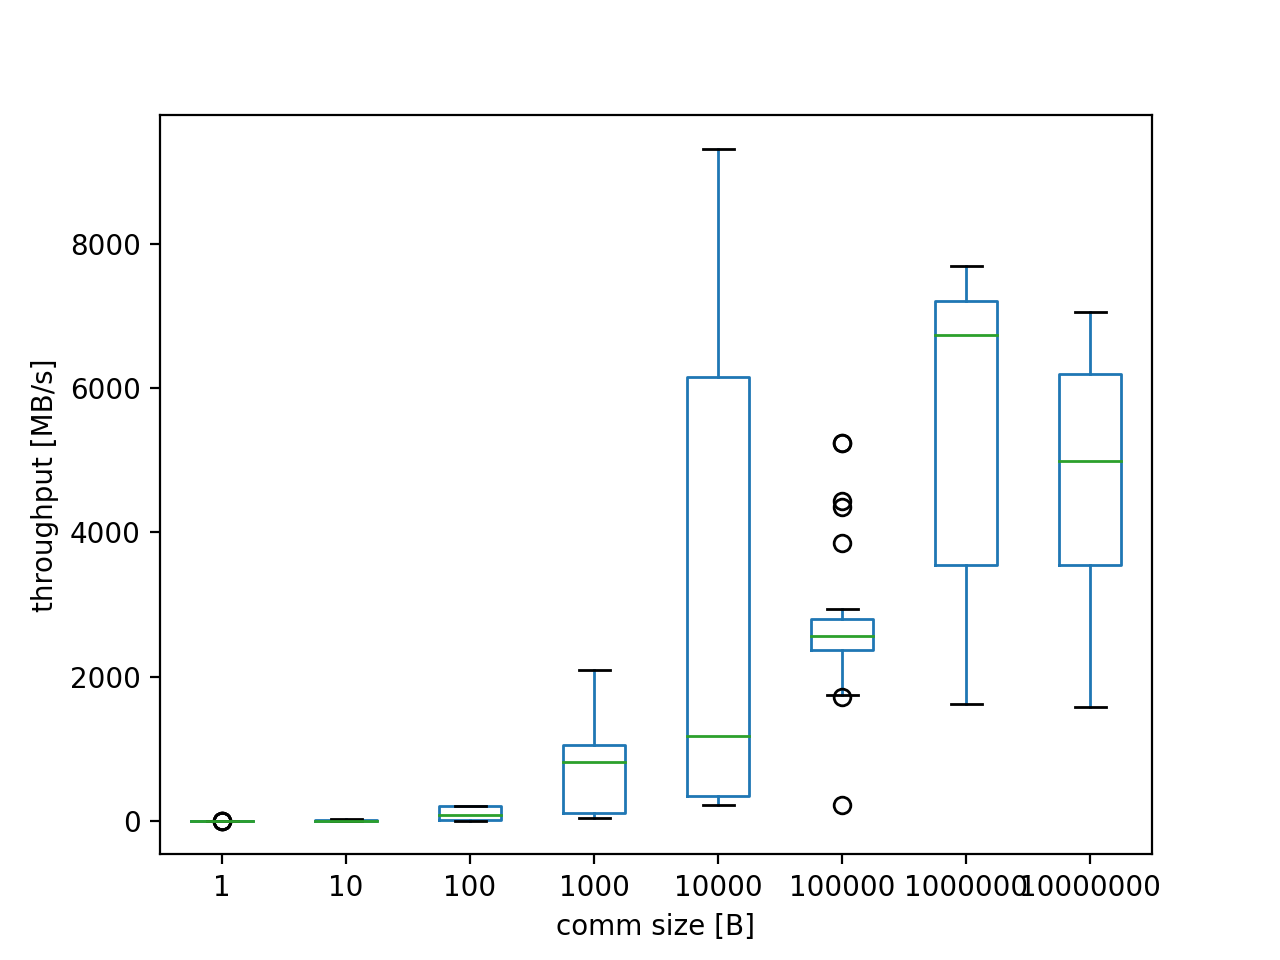

Text(0,0.5,'throughput [MB/s]')

In [9]:
bw_df = df[['try', 'len', 'throughput']].pivot(index='try', columns='len', values='throughput')
ax = bw_df.plot(kind='box')
ax.set_xlabel("comm size [B]")
ax.set_ylabel("throughput [MB/s]")
